In [126]:
import pandas as pd
import matplotlib.pyplot as plt


In [127]:
df=pd.read_csv(r'/content/Online Retail1.csv',encoding='latin')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [129]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [130]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [131]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [132]:
group=df.groupby('Description')['UnitPrice'].sum()
print(group)


Description
 4 PURPLE FLOCK DINNER CANDLES    100.67
 50'S CHRISTMAS GIFT BAG LARGE    185.28
 DOLLY GIRL BEAKER                271.38
 I LOVE LONDON MINI BACKPACK      405.80
 I LOVE LONDON MINI RUCKSACK        4.15
                                   ...  
wrongly marked carton 22804         0.00
wrongly marked. 23343 in box        0.00
wrongly sold (22719) barcode        0.00
wrongly sold as sets                0.00
wrongly sold sets                   0.00
Name: UnitPrice, Length: 4223, dtype: float64


In [133]:
df.drop('CustomerID',axis=1,inplace=True)

In [134]:
df.dropna(inplace=True)

In [135]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [136]:
df['InvoiceDate'].value_counts()

,count
InvoiceDate,
10/31/2011 14:41,1114
12/8/2011 9:28,749
12/9/2011 10:03,731
12/5/2011 17:24,721
6/29/2011 15:58,705
...,...
10/24/2011 17:16,1
5/3/2011 12:49,1
5/3/2011 12:51,1


In [137]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format="mixed")
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['minutes'] = df['InvoiceDate'].dt.minute

In [138]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,year,month,day,hour,minutes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,8,26


In [139]:
df.drop('InvoiceDate',axis=1,inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   UnitPrice    540455 non-null  float64
 5   Country      540455 non-null  object 
 6   year         540455 non-null  int32  
 7   month        540455 non-null  int32  
 8   day          540455 non-null  int32  
 9   hour         540455 non-null  int32  
 10  minutes      540455 non-null  int32  
dtypes: float64(1), int32(5), int64(1), object(4)
memory usage: 39.2+ MB


In [141]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])

In [142]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,year,month,day,hour,minutes
0,0,3438,3918,6,2.55,36,2010,12,1,8,26
1,0,2739,3926,6,3.39,36,2010,12,1,8,26
2,0,2975,913,8,2.75,36,2010,12,1,8,26
3,0,2919,1910,6,3.39,36,2010,12,1,8,26
4,0,2918,2911,6,3.39,36,2010,12,1,8,26


In [143]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_col=df.columns
df=sc.fit_transform(df)
df=pd.DataFrame(df,columns=df_col)

In [144]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=10,random_state=42)
df['Cluster']=k.fit_predict(df)

In [145]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,year,month,day,hour,minutes,Cluster
0,-1.714723,2.002132,1.560356,-0.016528,-0.021401,0.280056,-3.42926,1.266332,-1.618928,-2.07825,-0.236628,2
1,-1.714723,1.235834,1.567340,-0.016528,-0.012731,0.280056,-3.42926,1.266332,-1.618928,-2.07825,-0.236628,2
2,-1.714723,1.494556,-1.062994,-0.007354,-0.019337,0.280056,-3.42926,1.266332,-1.618928,-2.07825,-0.236628,2
3,-1.714723,1.433164,-0.192618,-0.016528,-0.012731,0.280056,-3.42926,1.266332,-1.618928,-2.07825,-0.236628,2
4,-1.714723,1.432068,0.681250,-0.016528,-0.012731,0.280056,-3.42926,1.266332,-1.618928,-2.07825,-0.236628,2


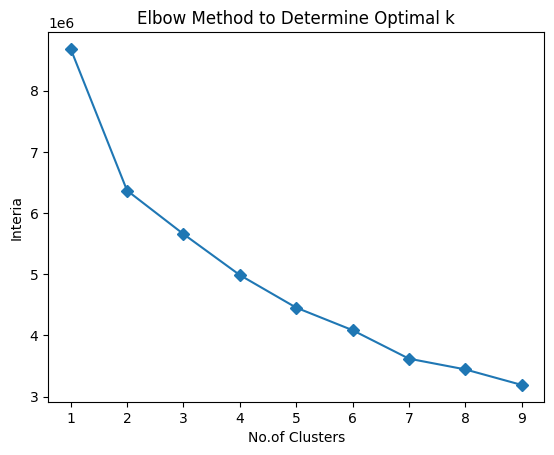

In [146]:
inertias=[]
range_clusters=range(1,10)

for i in range_clusters:
  k=KMeans(n_clusters=i,random_state=42)
  k.fit(df)
  inertias.append(k.inertia_)

#plt.figure(figsize=(12,5))
plt.plot(range_clusters,inertias,marker='D')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('No.of Clusters')
plt.ylabel('Interia')
plt.show()

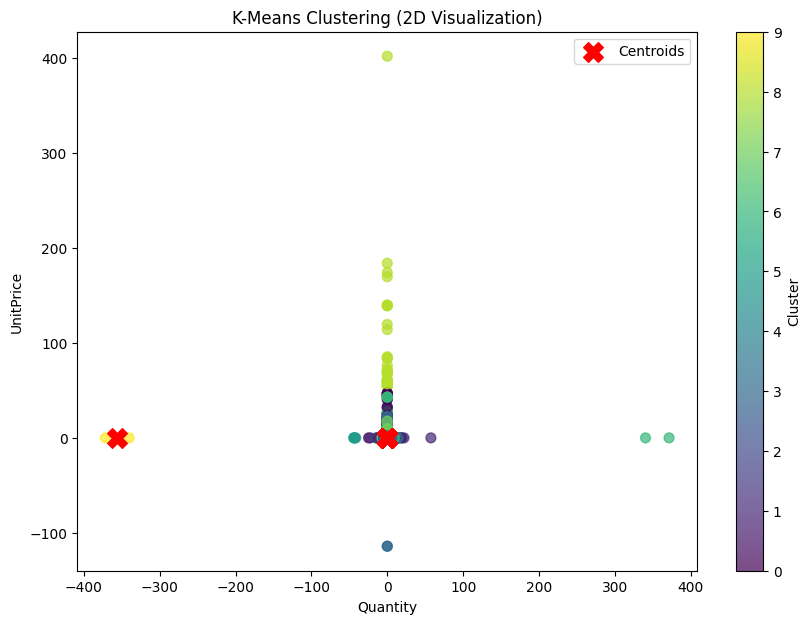

In [147]:
import matplotlib.pyplot as plt

# Select two features for 2D visualization (e.g., 'Quantity' and 'UnitPrice')
x_feature = 'Quantity'
y_feature = 'UnitPrice'

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df[x_feature],
    df[y_feature],
    c=df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.title("K-Means Clustering (2D Visualization)")
plt.xlabel(x_feature)
plt.ylabel(y_feature)

# Annotating cluster centroids on the graph
centroids_2d = k.cluster_centers_[:, [df.columns.get_loc(x_feature), df.columns.get_loc(y_feature)]]
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.show()


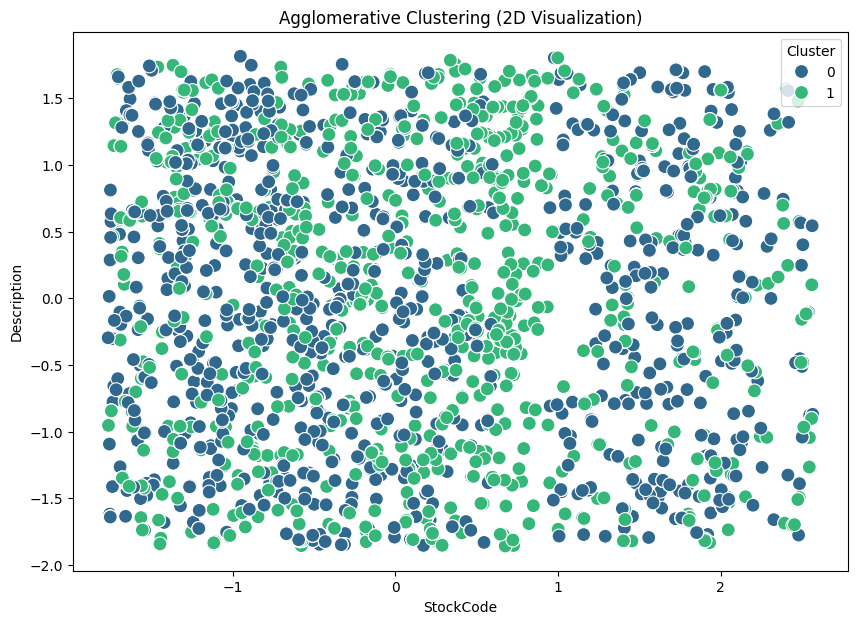

In [148]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns



# Selecting all features for clustering
features = df.drop(columns=["Cluster"])
features = df.sample(10000)
features = features.reset_index()
# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")
features['Agg_Cluster'] = agg_cluster.fit_predict(features)

# Visualize Agglomerative Clustering in 2D using two features
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features["StockCode"], y=features["Description"], hue=features['Agg_Cluster'], palette='viridis', s=100)
plt.title("Agglomerative Clustering (2D Visualization)")
plt.xlabel("StockCode")
plt.ylabel("Description")
plt.legend(title="Cluster")
plt.show()


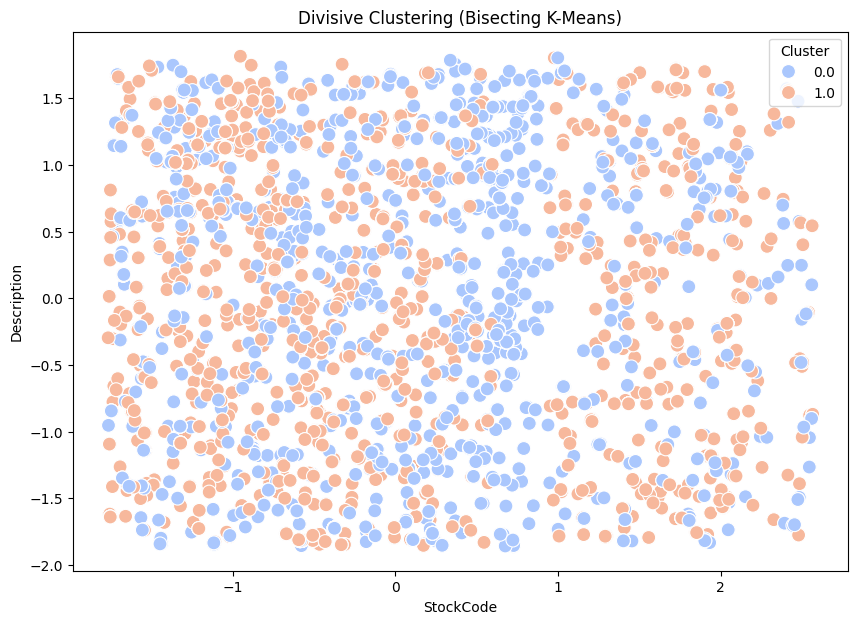

In [149]:
from sklearn.cluster import KMeans

# Perform Bisecting K-Means (Divisive Clustering)
# Start with all data as one cluster and split iteratively
def bisecting_kmeans(data, max_clusters):
    clusters = {0: data}
    cluster_assignments = pd.Series(0, index=data.index)
    cluster_id = 0

    while len(clusters) < max_clusters:
        # Choose the cluster to split
        cluster_to_split = max(clusters.keys(), key=lambda k: len(clusters[k]))
        cluster_data = clusters.pop(cluster_to_split)

        # Perform K-Means with k=2
        kmeans = KMeans(n_clusters=2, random_state=42)
        labels = kmeans.fit_predict(cluster_data)

        # Assign new clusters
        new_cluster_ids = [len(clusters), len(clusters) + 1]
        for i, label in enumerate(labels):
            cluster_assignments[cluster_data.index[i]] = new_cluster_ids[label]

        clusters[new_cluster_ids[0]] = cluster_data[labels == 0]
        clusters[new_cluster_ids[1]] = cluster_data[labels == 1]
        #clusters[new_cluster_ids[2]] = cluster_data[labels == 2]
        #clusters[new_cluster_ids[3]] = cluster_data[labels == 3]
        #clusters[new_cluster_ids[4]] = cluster_data[labels == 4]
        #clusters[new_cluster_ids[5]] = cluster_data[labels == 5]
        #clusters[new_cluster_ids[6]] = cluster_data[labels == 6]
        #clusters[new_cluster_ids[7]] = cluster_data[labels == 7]
        #clusters[new_cluster_ids[8]] = cluster_data[labels == 8]
        #clusters[new_cluster_ids[9]] = cluster_data[labels == 9]


    return cluster_assignments

# Apply Bisecting K-Means
df['Div_Cluster'] = bisecting_kmeans(features, max_clusters=2)

# Visualize Divisive Clustering in 2D using two features
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features["StockCode"], y=features["Description"], hue=df['Div_Cluster'], palette='coolwarm', s=100)
plt.title("Divisive Clustering (Bisecting K-Means)")
plt.xlabel("StockCode")
plt.ylabel("Description")
plt.legend(title="Cluster")
plt.show()


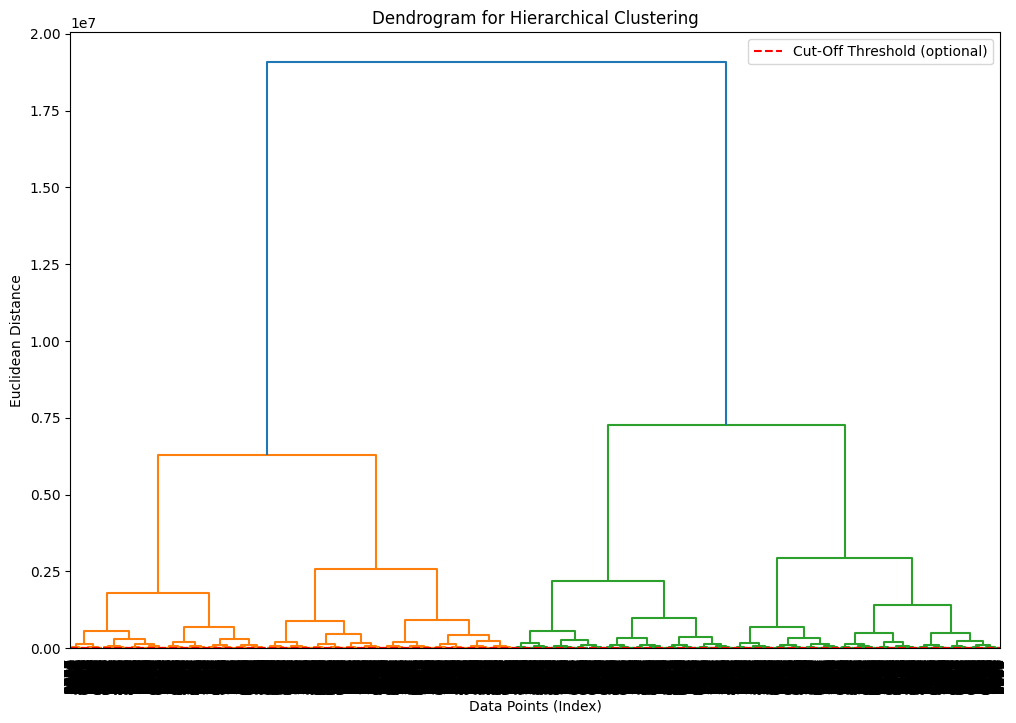

In [150]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering and compute the linkage matrix
linkage_matrix = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=features.index, leaf_rotation=90, leaf_font_size=10, color_threshold=0.7 * max(linkage_matrix[:, 2]))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points (Index)")
plt.ylabel("Euclidean Distance")
plt.axhline(y=10, color='r', linestyle='--', label='Cut-Off Threshold (optional)')
plt.legend()
plt.show()


In [151]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,year,month,day,hour,minutes,Cluster,Div_Cluster
0,-1.714723,2.002132,1.560356,-0.016528,-0.021401,0.280056,-3.429260,1.266332,-1.618928,-2.078250,-0.236628,2,0.0
1,-1.714723,1.235834,1.567340,-0.016528,-0.012731,0.280056,-3.429260,1.266332,-1.618928,-2.078250,-0.236628,2,1.0
2,-1.714723,1.494556,-1.062994,-0.007354,-0.019337,0.280056,-3.429260,1.266332,-1.618928,-2.078250,-0.236628,2,1.0
3,-1.714723,1.433164,-0.192618,-0.016528,-0.012731,0.280056,-3.429260,1.266332,-1.618928,-2.078250,-0.236628,2,0.0
4,-1.714723,1.432068,0.681250,-0.016528,-0.012731,0.280056,-3.429260,1.266332,-1.618928,-2.078250,-0.236628,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540450,1.571088,-0.131223,0.216817,0.010994,-0.038947,-3.411423,0.291608,1.266332,-0.695265,-0.441062,1.177775,6,NaN
540451,1.571088,0.171350,-1.211404,-0.016528,-0.026045,-3.411423,0.291608,1.266332,-0.695265,-0.441062,1.177775,6,NaN
540452,1.571088,0.546276,-1.206166,-0.025702,-0.004887,-3.411423,0.291608,1.266332,-0.695265,-0.441062,1.177775,6,NaN
540453,1.571088,0.547373,-1.207039,-0.025702,-0.004887,-3.411423,0.291608,1.266332,-0.695265,-0.441062,1.177775,6,NaN
